In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.metrics import Accuracy

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix


In [ ]:
# traning the dataset
instagram_df_train = pd.read_csv('insta_train.csv')
instagram_df_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
file_path = 'insta_train.csv'

In [ ]:
instagram_df_test = pd.read_csv('/content/insta_test.csv')
instagram_df_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [ ]:
instagram_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
x = instagram_df_train.iloc[:10]
x


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0
5,1,0.00,4,0.0,0,81,1,0,344,669987,150,0
6,1,0.00,2,0.0,0,50,0,0,16,122,177,0
7,1,0.00,2,0.0,0,0,0,0,33,1078,76,0
8,1,0.00,0,0.0,0,71,0,0,72,1824,2713,0
9,1,0.00,2,0.0,0,40,1,0,213,12945,813,0


In [ ]:
x = instagram_df_train.iloc[:,9]
x

0      1000
1      2740
2       159
3       414
4       151
       ... 
571     166
572      66
573      96
574      57
575     150
Name: #followers, Length: 576, dtype: int64

In [ ]:
instagram_df_train.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
instagram_df_train.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
instagram_df_train['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [ ]:
instagram_df_train['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [ ]:
instagram_df_train['#followers'].value_counts()

#followers
0      18
49      9
16      8
15      8
1       7
       ..
192     1
200     1
484     1
650     1
126     1
Name: count, Length: 372, dtype: int64

In [ ]:
instagram_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [ ]:
instagram_df_test.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [ ]:
instagram_df_test.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
instagram_df_test['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

<Axes: ylabel='count'>

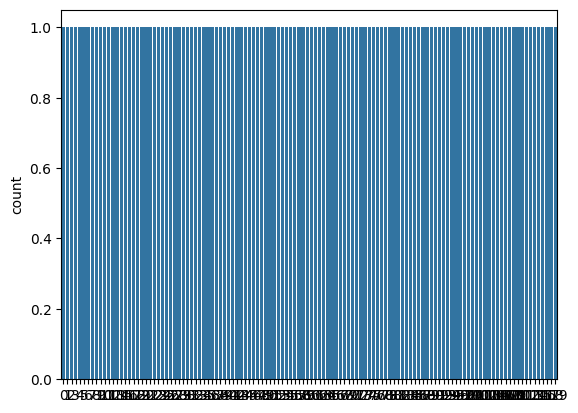

In [ ]:
sns.countplot(instagram_df_test['fake'])

In [ ]:
instagram_df_train['fake']

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
plt.show()

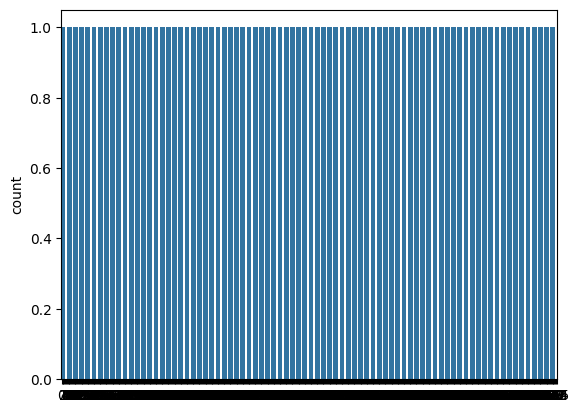

In [ ]:
sns.countplot(instagram_df_train['fake'])
plt.show()

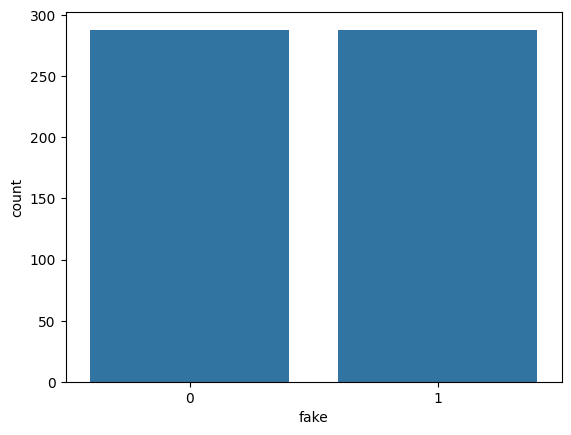

In [ ]:

colors = ['blue','yellow']
sns.countplot(x='fake',data=instagram_df_train)
sns.set_palette(sns.color_palette(colors))
plt.show()

<ipython-input-28-bab891cae006>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake',data=instagram_df_train,palette='Set2',color='green')


<Axes: xlabel='fake', ylabel='count'>

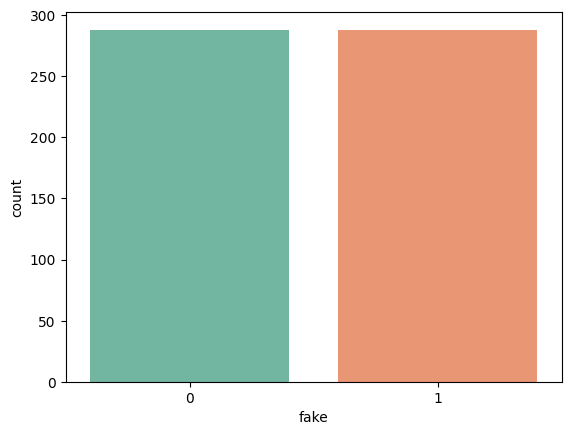

In [ ]:
sns.countplot(x='fake',data=instagram_df_train,palette='Set2',color='green')

<ipython-input-29-bc32ac07b255>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake',data=instagram_df_train,palette='Set2')


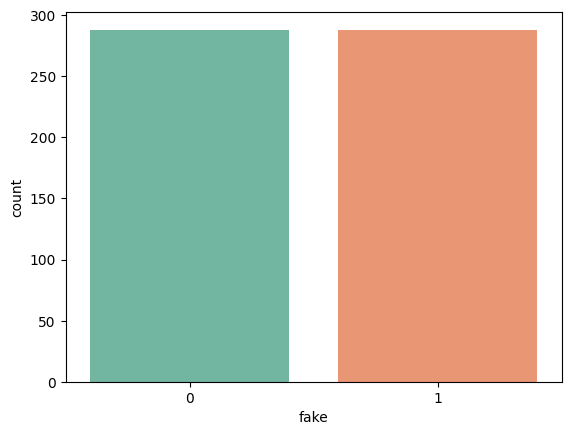

In [ ]:
colors = ['blue','yellow']
sns.countplot(x='fake',data=instagram_df_train,palette='Set2')
sns.set_palette(sns.color_palette(colors))
plt.show()

<ipython-input-30-0109b21b7dcd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='private',data=instagram_df_train,palette='Set2')


<Axes: xlabel='private', ylabel='count'>

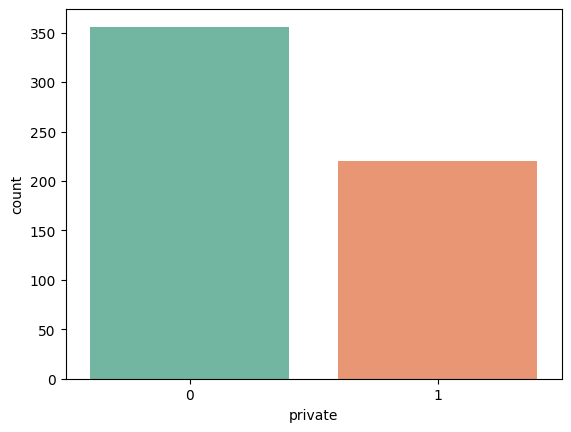

In [ ]:
sns.countplot(x='private',data=instagram_df_train,palette='Set2')

<ipython-input-31-987912278c13>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='profile pic',data=instagram_df_train,palette='Set2')


<Axes: xlabel='profile pic', ylabel='count'>

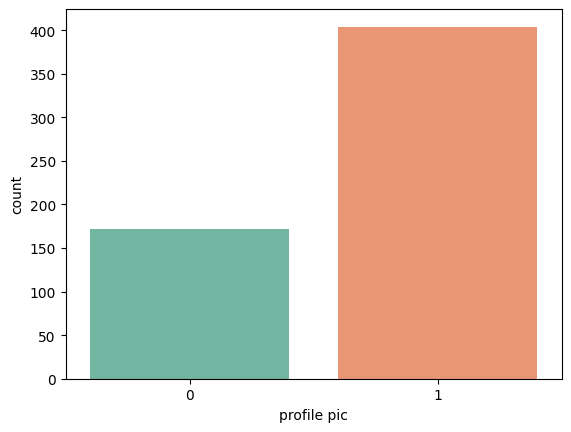

In [ ]:
sns.countplot(x='profile pic',data=instagram_df_train,palette='Set2')

<ipython-input-32-9d8494be20d2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(instagram_df_train['nums/length username'])


<Axes: xlabel='nums/length username', ylabel='Density'>

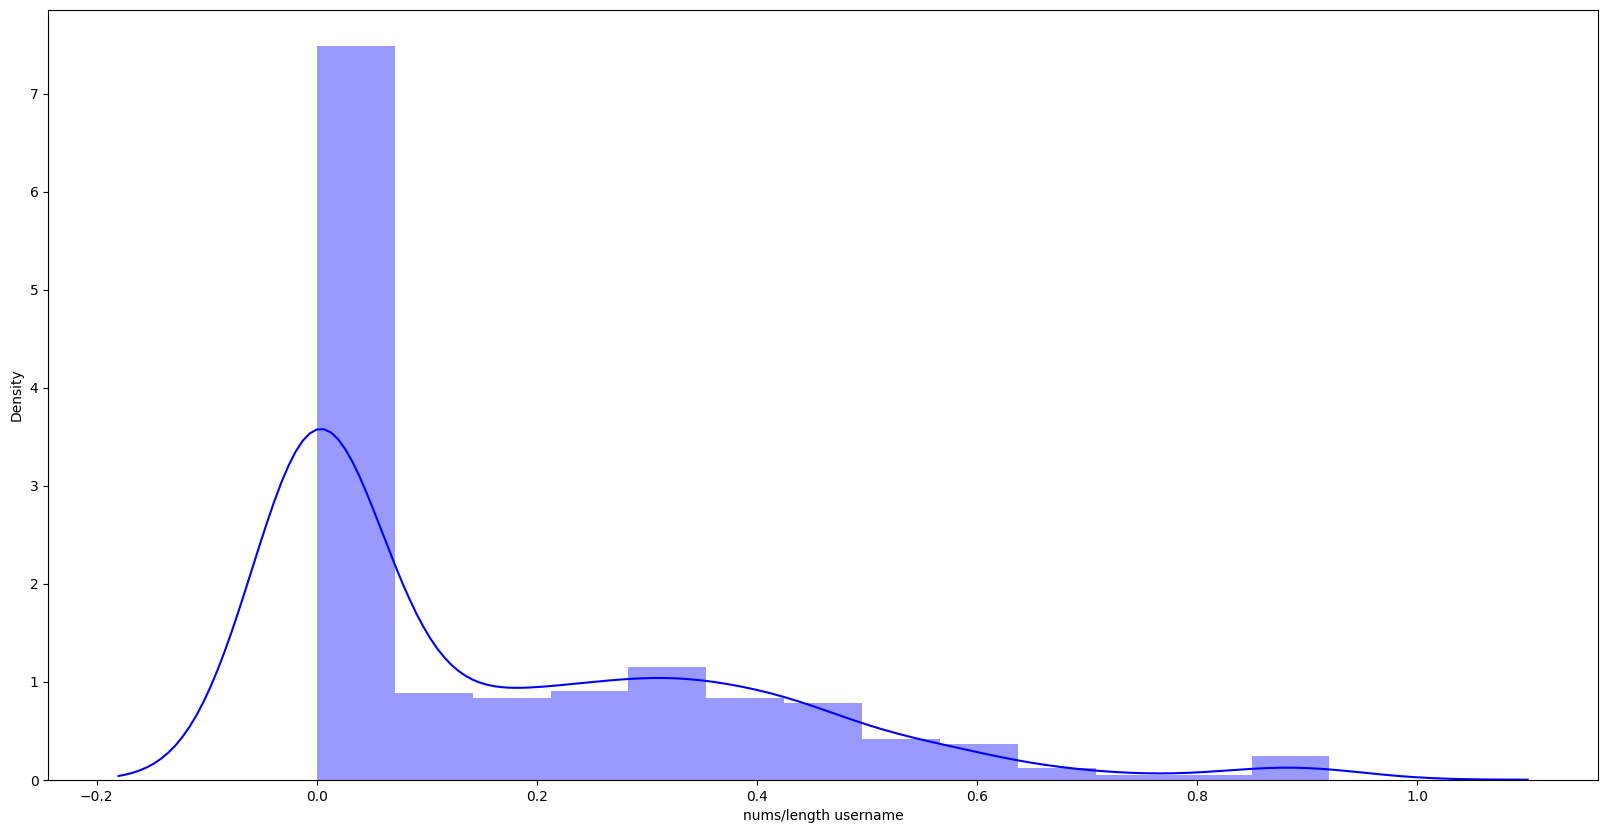

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(instagram_df_train['nums/length username'])

<ipython-input-33-ef4bddd8ec1e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='private',data=instagram_df_train,palette='Set2',width=0.2)


<Axes: xlabel='private', ylabel='count'>

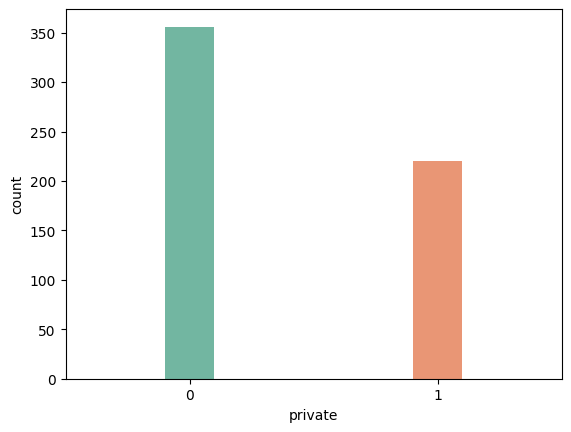

In [ ]:
sns.countplot(x='private',data=instagram_df_train,palette='Set2',width=0.2)

<Figure size 2000x2000 with 0 Axes>

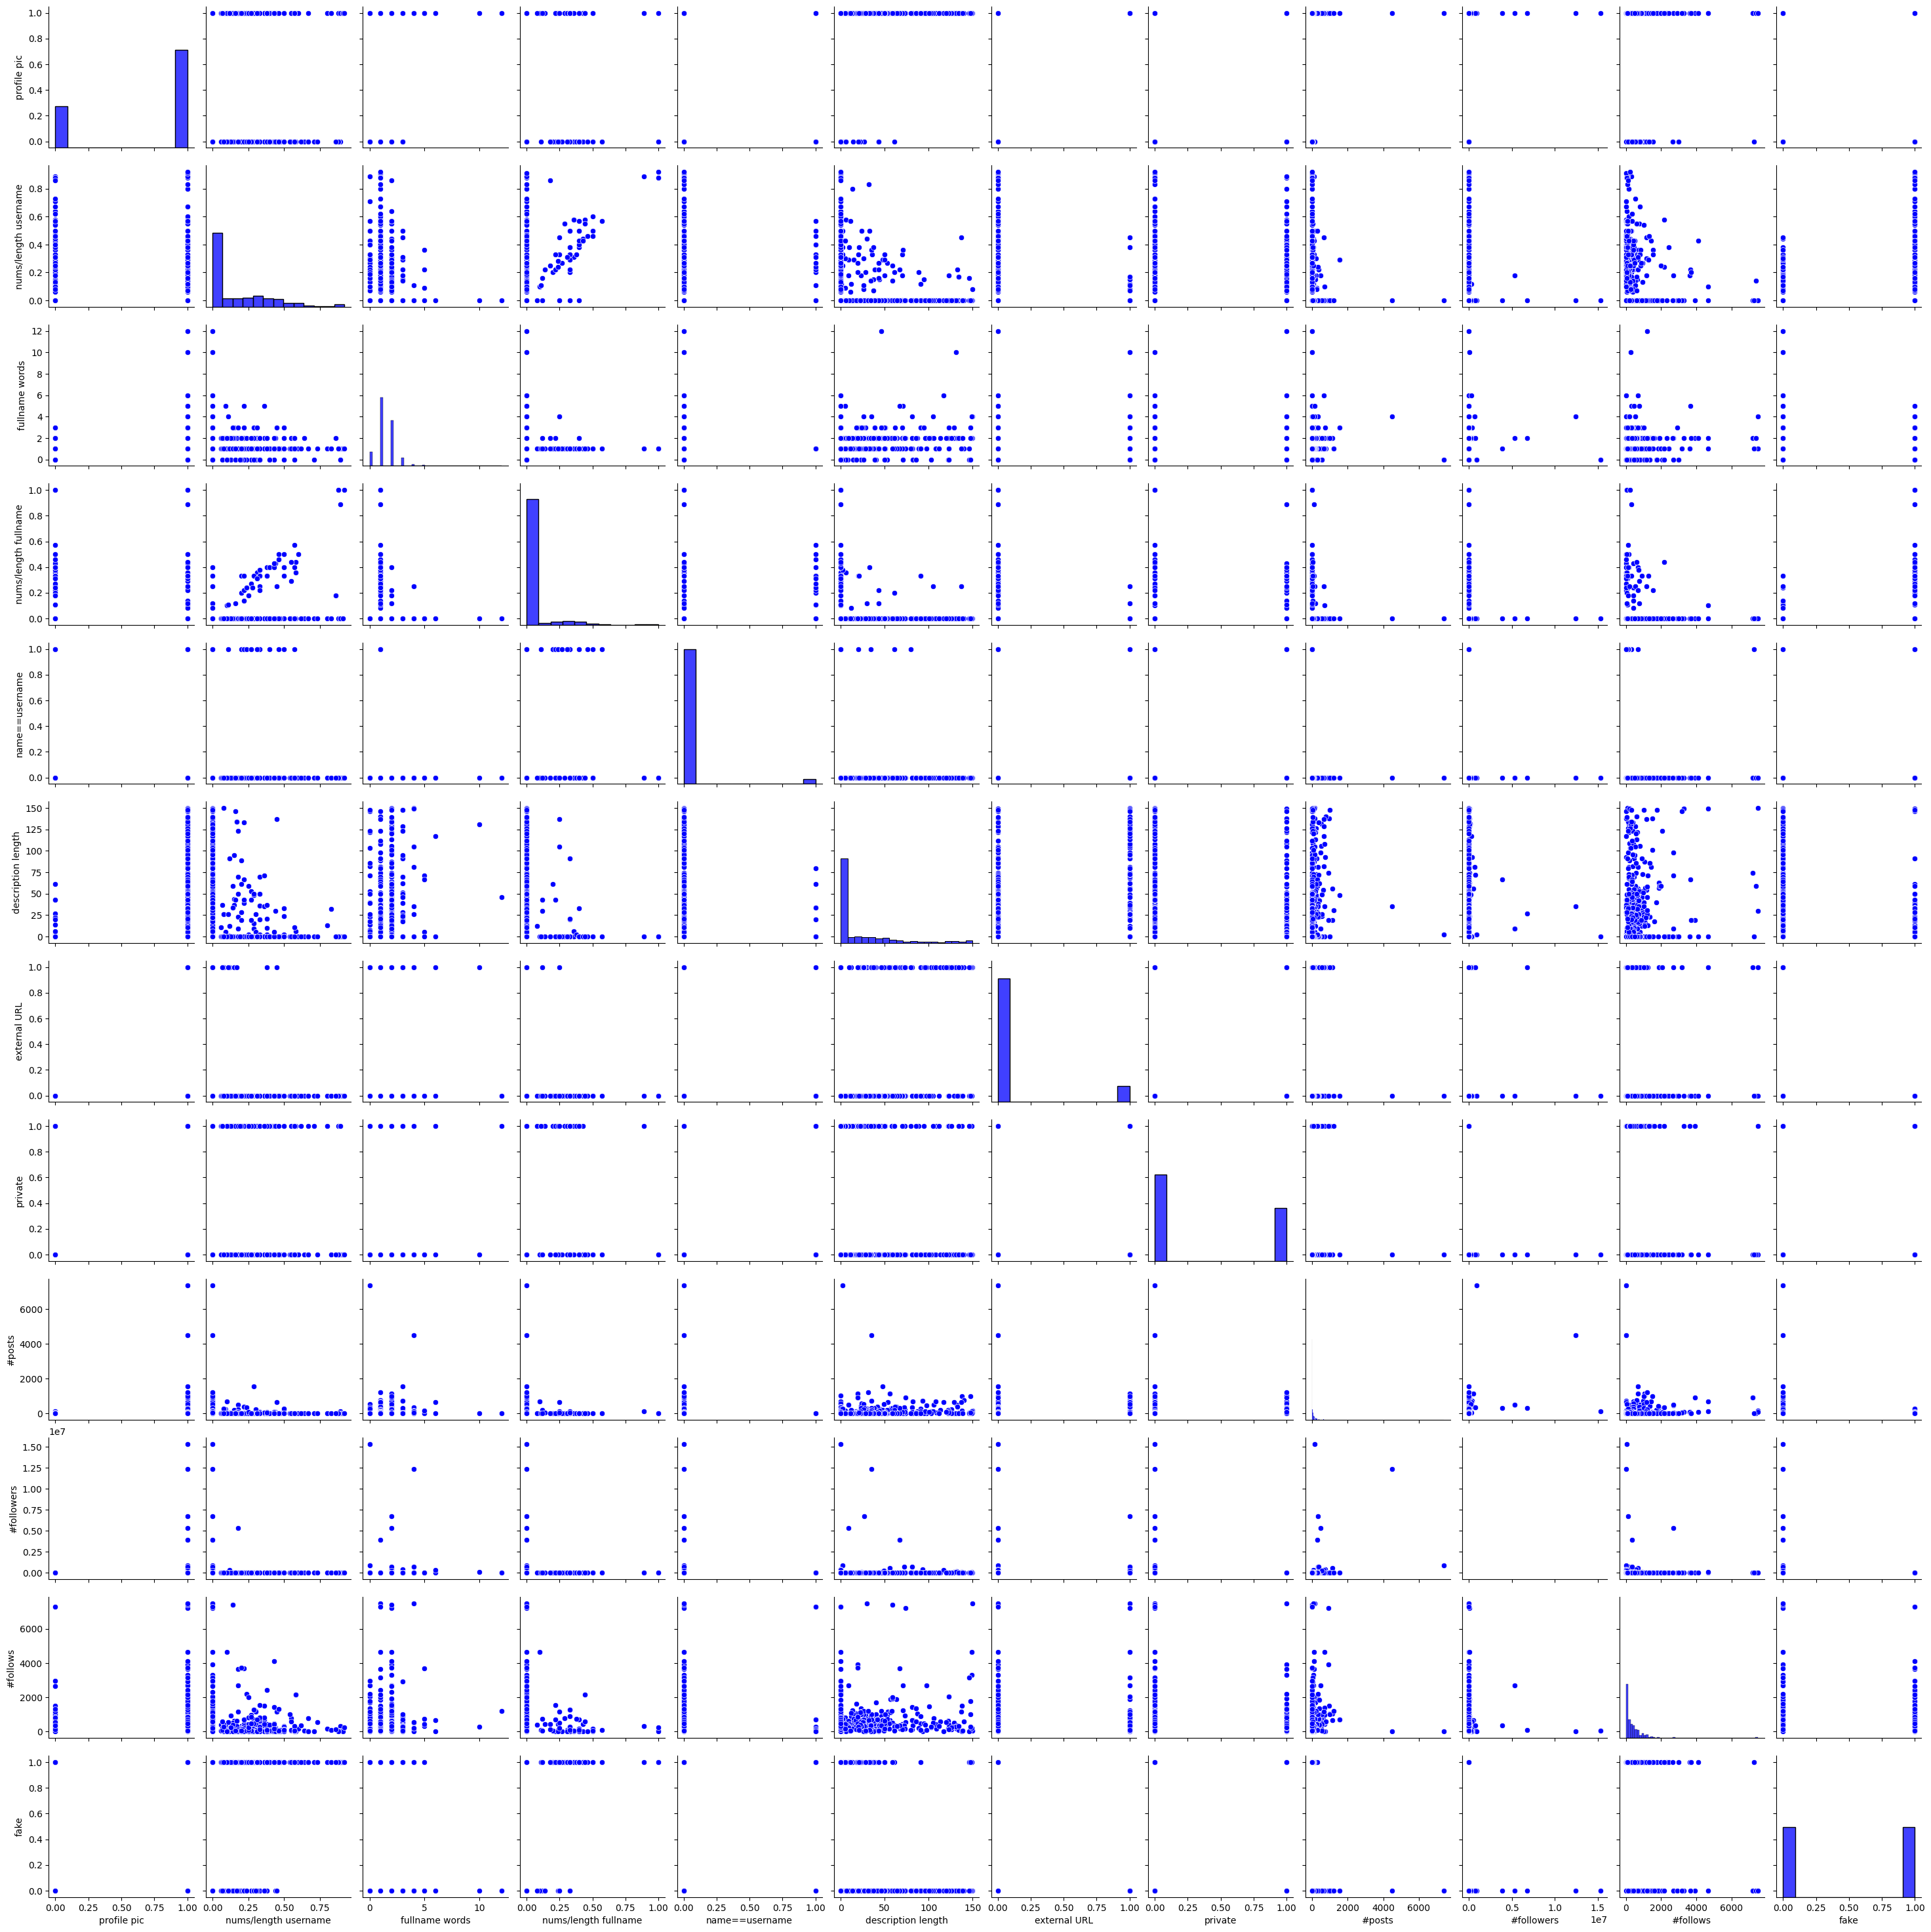

In [ ]:
plt.figure(figsize =(20,20))
sns.pairplot(instagram_df_train)

<Axes: >

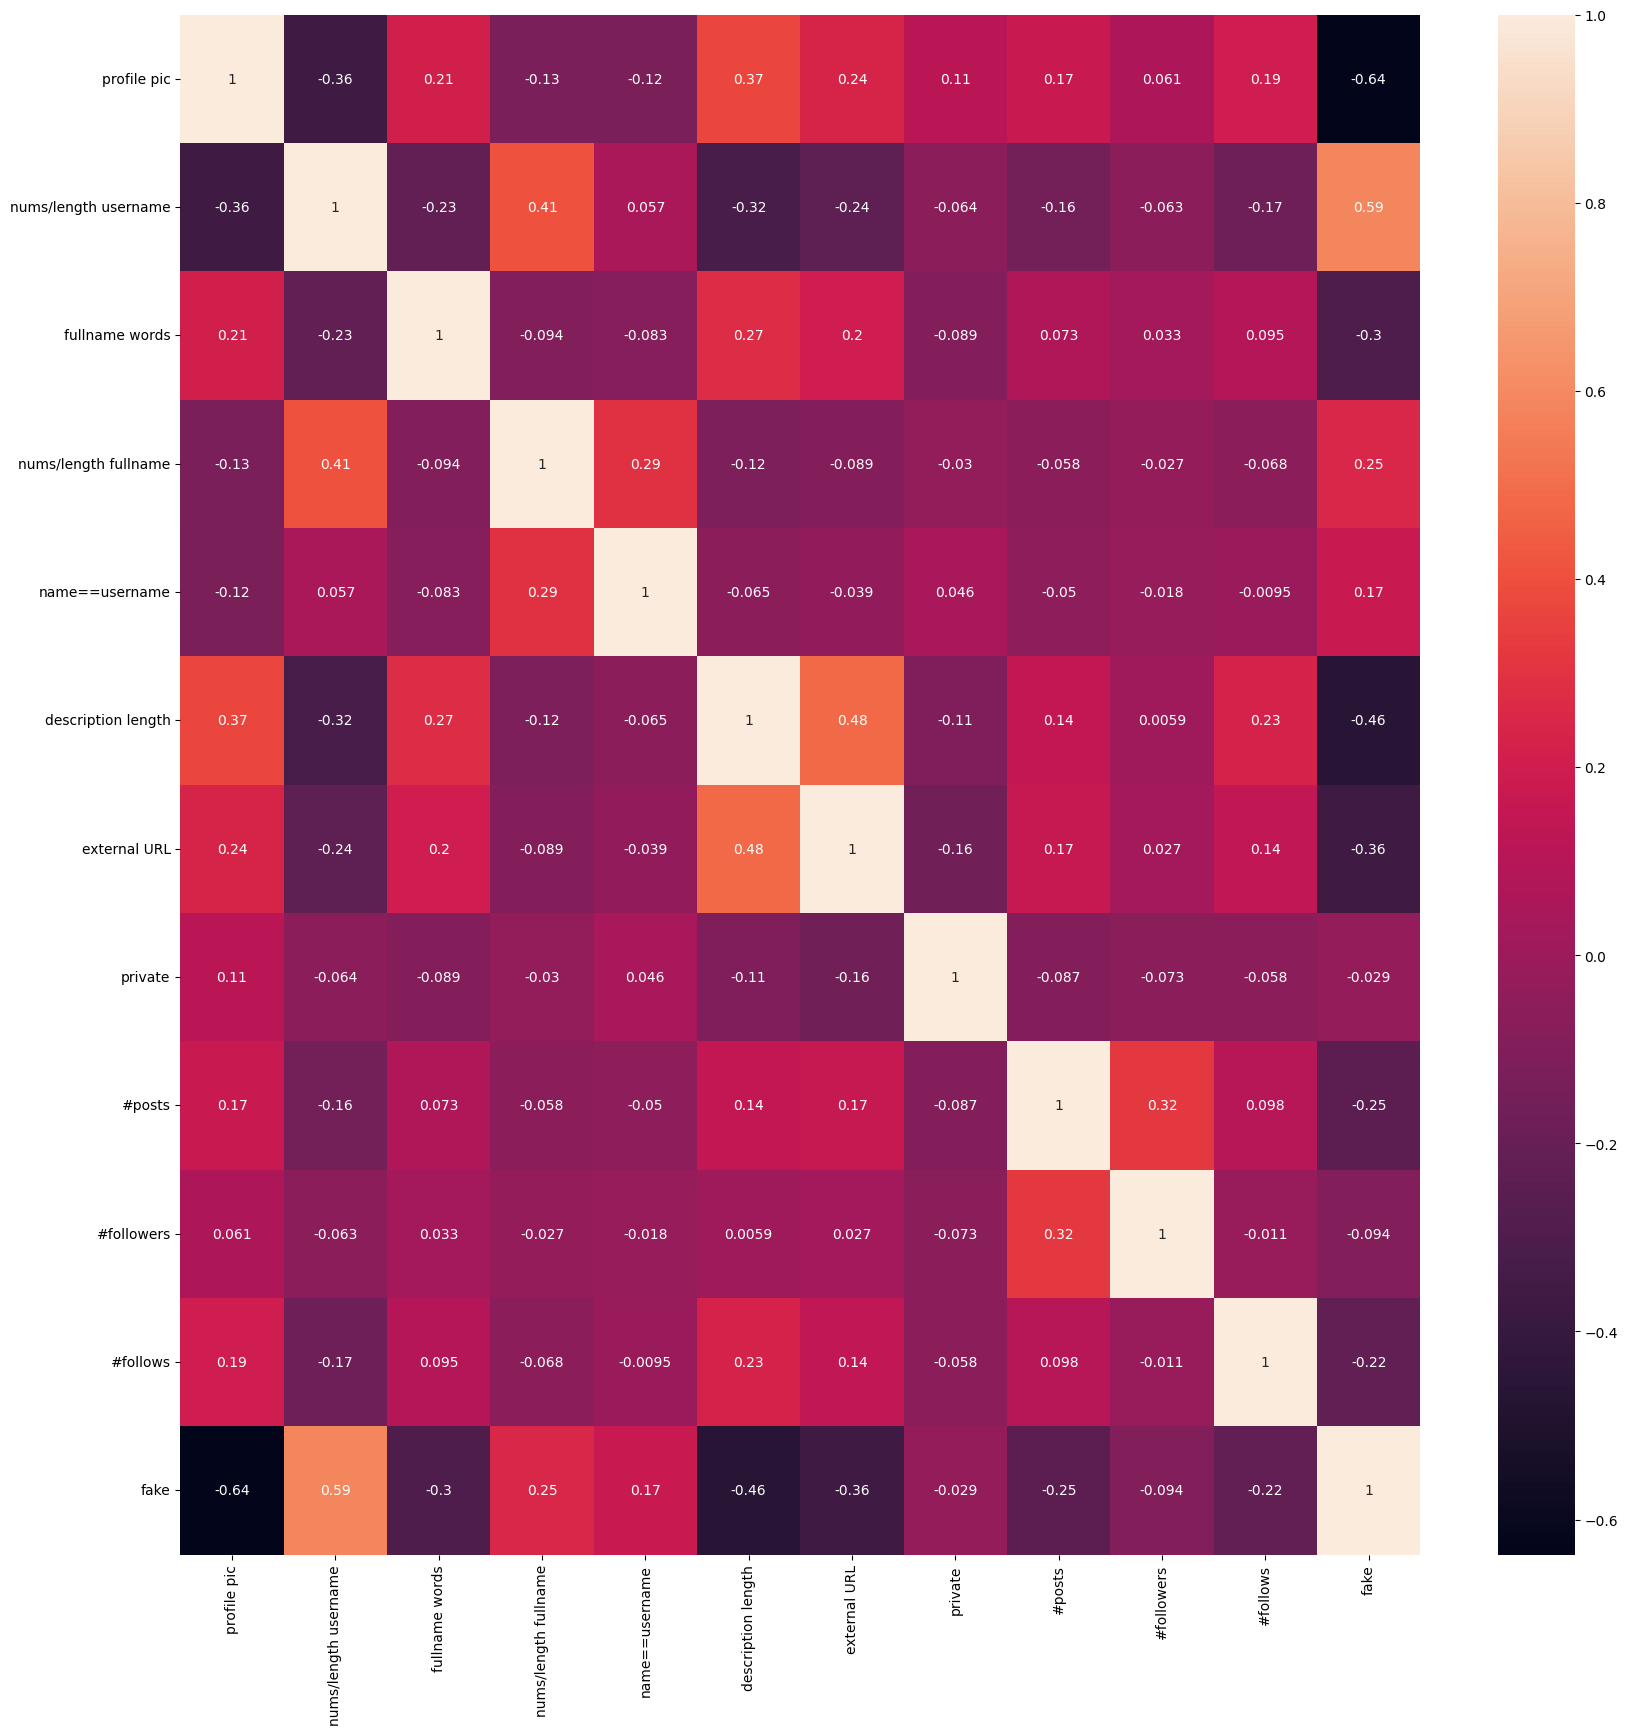

In [ ]:
plt.figure(figsize=(20,20))
cm = instagram_df_train.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True,ax = ax)
#correlation plot

<ipython-input-36-519c13e3f830>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='private',data=instagram_df_test,palette='Set2',width=0.2)


<Axes: xlabel='private', ylabel='count'>

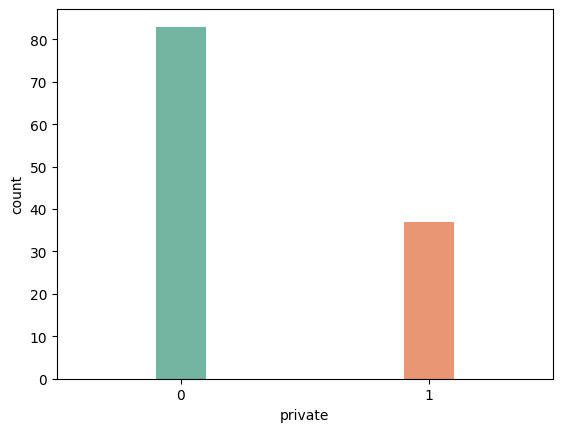

In [ ]:
sns.countplot(x='private',data=instagram_df_test,palette='Set2',width=0.2)

<ipython-input-37-af9ac9930a87>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake',data=instagram_df_test,palette='Set2',width=0.2)


<Axes: xlabel='fake', ylabel='count'>

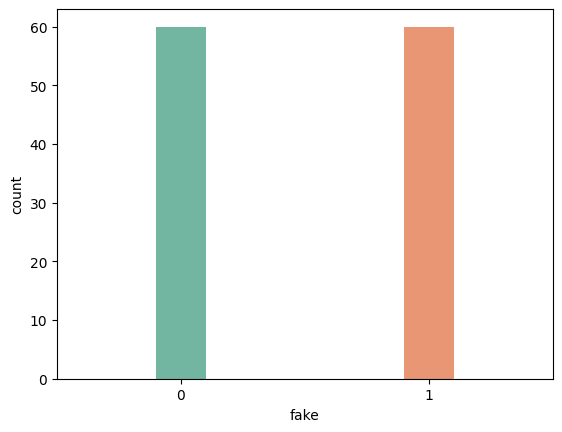

In [ ]:
sns.countplot(x='fake',data=instagram_df_test,palette='Set2',width=0.2)

<ipython-input-38-6803e08b2d6b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='profile pic',data=instagram_df_test,palette='Set2',width=0.2)


<Axes: xlabel='profile pic', ylabel='count'>

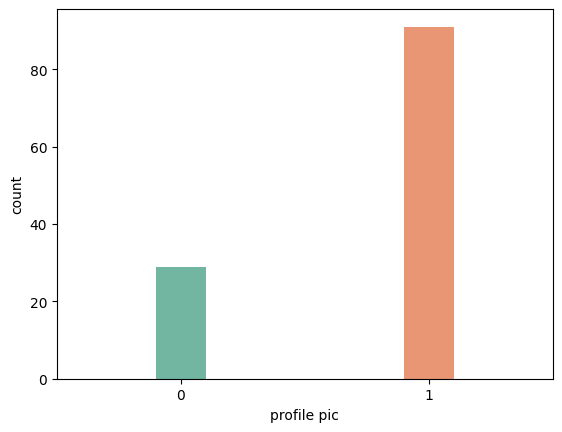

In [ ]:
sns.countplot(x='profile pic',data=instagram_df_test,palette='Set2',width=0.2)

In [ ]:
x_train = instagram_df_train.drop(columns = ['fake'])
x_test = instagram_df_test.drop(columns = ['fake'])
x_train

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.27,0,0.00,0,53,0,0,32,1000,955
1,1,0.00,2,0.00,0,44,0,0,286,2740,533
2,1,0.10,2,0.00,0,0,0,1,13,159,98
3,1,0.00,1,0.00,0,82,0,0,679,414,651
4,1,0.00,2,0.00,0,0,0,1,6,151,126
...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596
572,1,0.38,1,0.33,0,21,0,0,44,66,75
573,1,0.57,2,0.00,0,0,0,0,4,96,339
574,1,0.57,1,0.00,0,11,0,0,0,57,73


In [ ]:
x_test

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows
0,1,0.33,1,0.33,1,30,0,1,35,488,604
1,1,0.00,5,0.00,0,64,0,1,3,35,6
2,1,0.00,2,0.00,0,82,0,1,319,328,668
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369
4,1,0.50,1,0.00,0,76,0,1,6,225,356
...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811
116,1,0.40,1,0.00,0,0,0,0,4,150,164
117,1,0.00,2,0.00,0,0,0,0,3,833,3572
118,0,0.17,1,0.00,0,0,0,0,1,219,1695


In [ ]:
y_train = instagram_df_train['fake']
y_test = instagram_df_test['fake']

In [ ]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
571    1
572    1
573    1
574    1
575    1
Name: fake, Length: 576, dtype: int64

In [ ]:
y_test

0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    1
117    1
118    1
119    1
Name: fake, Length: 120, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 2)

In [ ]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [ ]:
x_train.shape, x_test.shape

((576, 11), (120, 11))

In [ ]:
y_train.shape,y_test.shape

((576, 2), (120, 2))

In [ ]:
training_data = len(x_train)/ (len(x_train)+len(x_test))*100
training_data

82.75862068965517

In [ ]:
test_data = len(x_test)/ (len(x_train)+len(x_test))*100
test_data

17.24137931034483

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
model = Sequential()
model.add (Dense(50,input_dim= 11,activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                600       
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 2)                 302       
                                                                 
Total params: 31202 (121.88 KB)
Trainable params: 31202 (121.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 2s 26ms/step - loss: 0.4859 - accuracy: 0.8687 - val_loss: 0.3792 - val_accuracy: 0.8448
Epoch 2/20
17/17 [==============================] - 0s 6ms/step - loss: 0.2729 - accuracy: 0.9035 - val_loss: 0.2424 - val_accuracy: 0.8966
Epoch 3/20
17/17 [==============================] - 0s 7ms/step - loss: 0.2452 - accuracy: 0.9093 - val_loss: 0.1990 - val_accuracy: 0.9138
Epoch 4/20
17/17 [==============================] - 0s 6ms/step - loss: 0.2192 - accuracy: 0.9151 - val_loss: 0.1980 - val_accuracy: 0.9138
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2098 - accuracy: 0.9208 - val_loss: 0.1927 - val_accuracy: 0.9310
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.1953 - accuracy: 0.9247 - val_loss: 0.1591 - val_accuracy: 0.9483
Epoch 7/20
17/17 [==============================] - 0s 4ms/step - loss: 0.1896 - accuracy: 0.9324 - val_loss: 0.2318 - val_accuracy: 0.8793
Epoch 8/20
17/17 [=

In [ ]:
model = Sequential()
model.add (Dense(50,input_dim= 11,activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                600       
                                                                 
 dense_5 (Dense)             (None, 150)               7650      
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 25)                3775      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 52        
                                                                 
Total params: 12077 (47.18 KB)
Trainable params: 12077

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
epochs_hist = model.fit(x_train, y_train, epochs=20, verbose=1, validation_split=0.1)

Epoch 1/20
17/17 [==============================] - 1s 18ms/step - loss: 0.5708 - accuracy: 0.7683 - val_loss: 0.3680 - val_accuracy: 0.8276
Epoch 2/20
17/17 [==============================] - 0s 5ms/step - loss: 0.3743 - accuracy: 0.8880 - val_loss: 0.2285 - val_accuracy: 0.8793
Epoch 3/20
17/17 [==============================] - 0s 4ms/step - loss: 0.2698 - accuracy: 0.8919 - val_loss: 0.1809 - val_accuracy: 0.9138
Epoch 4/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2574 - accuracy: 0.9054 - val_loss: 0.1715 - val_accuracy: 0.9310
Epoch 5/20
17/17 [==============================] - 0s 6ms/step - loss: 0.2351 - accuracy: 0.9054 - val_loss: 0.1456 - val_accuracy: 0.9310
Epoch 6/20
17/17 [==============================] - 0s 6ms/step - loss: 0.2351 - accuracy: 0.9035 - val_loss: 0.1761 - val_accuracy: 0.8966
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.2331 - accuracy: 0.9151 - val_loss: 0.1520 - val_accuracy: 0.9310
Epoch 8/20
17/17 [=

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


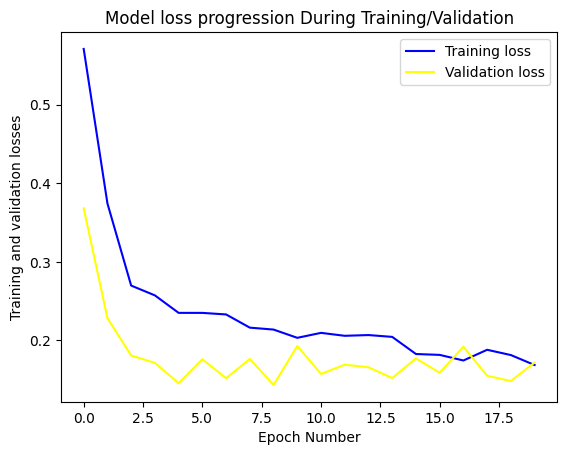

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model loss progression During Training/Validation')
plt.ylabel('Training and validation losses')
plt.xlabel('Epoch Number')
plt.legend(['Training loss' , 'Validation loss'])

In [ ]:
predicted = model.predict(x_test)

4/4 [==============================] - 0s 5ms/step


In [ ]:
predicted_value = []
test =[]
for i in predicted:
  predicted_value.append(np.argmax(i))

for i in y_test:
  test.append(np.argmax(i))

In [ ]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        60
           1       1.00      0.02      0.03        60

    accuracy                           0.51       120
   macro avg       0.75      0.51      0.35       120
weighted avg       0.75      0.51      0.35       120



<Axes: >

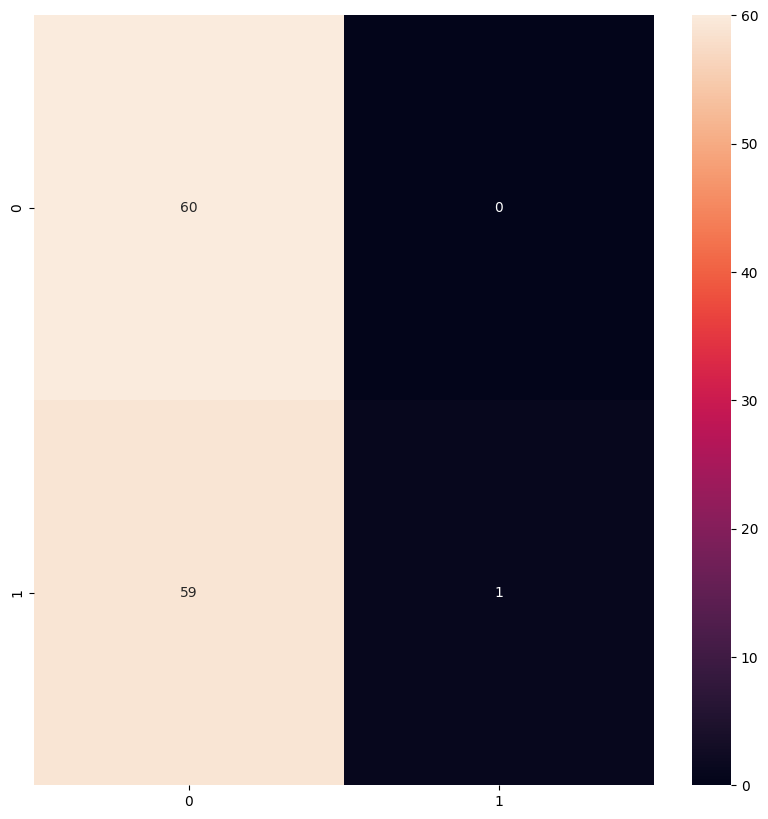

In [ ]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot = True)